## GReaT Example with Iris Dataset

In [1]:
# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import numpy as np
import pandas as pd
import logging

In [3]:
from examples.utils import set_logging_level
from be_great import GReaT

/data/guoquanjiang/envs/begreat/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import matplotlib.pyplot as plt

In [5]:
logger = set_logging_level(logging.INFO)
data = pd.read_csv('C:/Users/Windows 11/Desktop/Dissertation/Codes/Data/Engineering/Cement Manufacturing Dataset.csv')
data=data.sample(n=1000)
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
226,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,56,51.72
473,359.0,19.0,141.0,154.0,10.9,942.0,801.0,56,66.78
558,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,3,13.33
173,276.0,116.0,90.0,180.0,9.0,870.0,768.0,28,44.28
655,307.0,0.0,0.0,193.0,0.0,968.0,812.0,3,12.54


### Create GReaT Model

In [6]:
# great = GReaT("/data/guoquanjiang/llm_ner/llama3-8b/LLM-Research/Meta-Llama-3-8B",                  # Name of the large language model used (see HuggingFace for more options)
#               epochs=10,                   # Number of epochs to train
#               save_steps=2000,               # Save model weights every x steps
#               logging_steps=500,             # Log the loss and learning rate every x steps
#               experiment_dir="trainer_travel", # Name of the directory where all intermediate steps are saved
#               batch_size=16,                 # Batch Size
#               #lr_scheduler_type="constant", # Specify the learning rate scheduler 
#               #learning_rate=5e-5            # Set the inital learning rate
#               efficient_finetuning="lora"
#              )
great = GReaT("C:/Users/Windows 11/Desktop/Dissertation/Codes/models/iiBcai/gpt2",                  # Name of the large language model used (see HuggingFace for more options)
              epochs=10,                   # Number of epochs to train
              save_steps=2000,               # Save model weights every x steps
              logging_steps=100,             # Log the loss and learning rate every x steps
              experiment_dir="trainer_cement", # Name of the directory where all intermediate steps are saved
              batch_size=16                # Batch Size
              #lr_scheduler_type="constant", # Specify the learning rate scheduler 
              #learning_rate=5e-5            # Set the inital learning rate
            #   efficient_finetuning="lora"
             )

### Start Training

In [7]:
trainer = great.fit(data)

2024-06-30 14:33:52,836 - INFO - Convert data into HuggingFace dataset object... (great.py:167)
2024-06-30 14:33:52,856 - INFO - Create GReaT Trainer... (great.py:172)
2024-06-30 14:33:53,530 - INFO - Start training... (great.py:188)
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
100,1.410900
200,1.097000
300,1.048900
400,1.025900
500,1.013900
600,1.003300


In [8]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 107.1814,
 'train_samples_per_second': 93.3,
 'train_steps_per_second': 5.878,
 'total_flos': 357198455808000.0,
 'train_loss': 1.095102752201141,
 'epoch': 10.0,
 'step': 630}

In [9]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

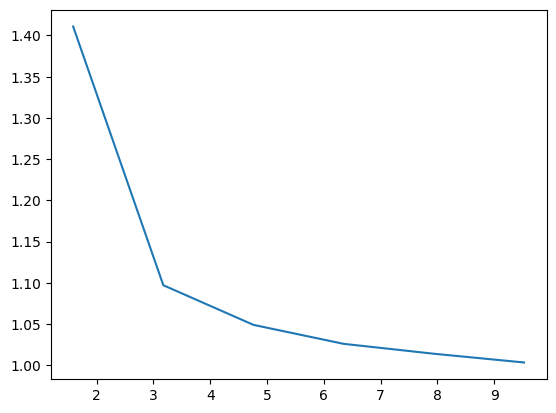

In [10]:
plt.plot(epochs, loss)

### Generate Samples

In [11]:
n_samples = 1000

In [12]:
samples = great.sample(n_samples, k=50, max_length=200)

1001it [00:26, 38.48it/s]                         


In [13]:
samples.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,153.0,0.0,0.0,178.0,0.0,932.0,755.0,28.0,31.42
1,475.0,0.0,0.0,159.4,0.0,932.0,746.4,28.0,46.23
2,446.0,0.0,0.0,182.0,0.0,942.0,879.0,28.0,25.46
3,331.0,0.0,0.0,186.0,6.0,932.0,789.0,28.0,18.02
4,305.0,0.0,0.0,228.0,0.0,1007.0,749.0,3.0,22.32


In [14]:
samples.to_csv("C:/Users/Windows 11/Desktop/Dissertation/Codes/sample_data/Engineering/cement_samples.csv",index=False)

## Plot Data

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
670,30,No,Low Income,1,No,Yes,0
211,29,No,Low Income,2,No,No,0
821,37,Yes,High Income,1,No,No,0
410,30,No,Middle Income,3,No,Yes,0
255,37,No,Middle Income,6,No,Yes,0


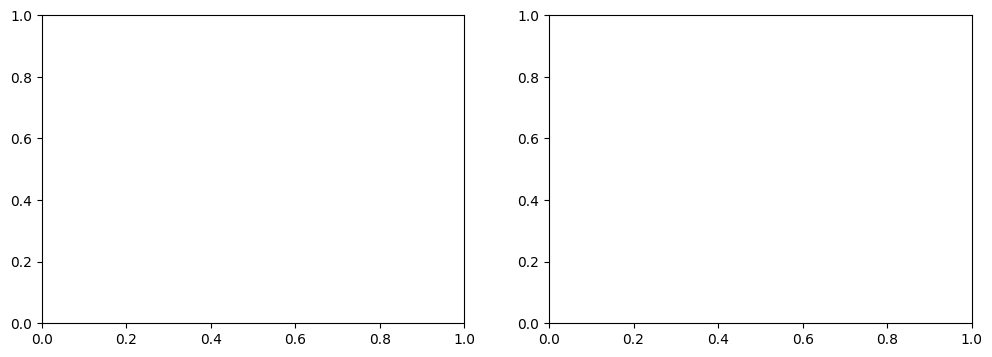

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
true_samples = data.sample(n = 100)
true_samples.head()

Original Data

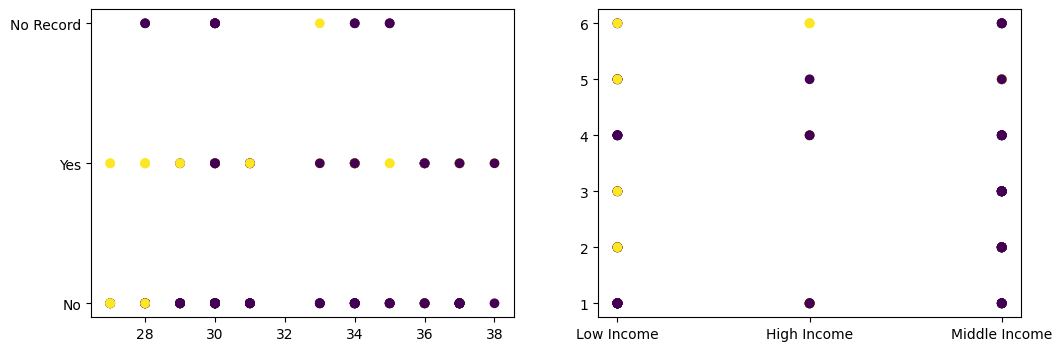

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
true_samples = data.sample(n = 200)
ax[0].scatter(true_samples["Age"], true_samples["FrequentFlyer"], c=true_samples["Target"])
ax[1].scatter(true_samples["AnnualIncomeClass"], true_samples["ServicesOpted"], c=true_samples["Target"])

Generated samples

In [28]:
samples = pd.read_csv("C:/Users/Windows 11/Desktop/Dissertation/Codes/sample_data/travel_samples.csv")

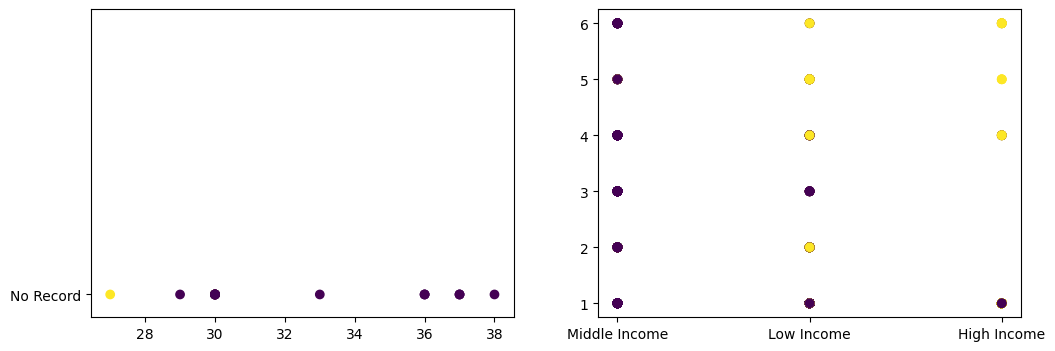

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(samples["Age"], samples["FrequentFlyer"], c=samples["Target"])
ax[0].set_ylim(1.8, 4.5)
ax[1].scatter(samples["AnnualIncomeClass"], samples["ServicesOpted"], c=samples["Target"].astype("int"))
